In [72]:
import pandas as pd
import numpy as np

In [58]:
df_2022 = pd.read_csv("../data/01_raw/2022/contents.csv")
df_2023 = pd.read_csv("../data/01_raw/2023/contents.csv")
df_2021 = pd.read_csv("../data/01_raw/2021/contents.csv")
df_text = pd.concat([df_2021, df_2022, df_2023])

In [67]:
df_2021 = pd.read_csv("../data/01_raw/2021/tickets.csv")
df_2022 = pd.read_csv("../data/01_raw/2022/tickets.csv")
df_2023 = pd.read_csv("../data/01_raw/2023/tickets.csv")
df_ticket = pd.concat([df_2021, df_2022, df_2023])
df_ticket.columns

Index(['ID', 'Beschreibung', 'Kategorie ID', 'Kategorietext',
       'Unterkategorie ID', 'Unterkategorietext', 'Ticket Label',
       'Abteilung Label', 'Produkt Label', 'Priorität', 'Status',
       'Angelegt Am', 'Angelegt Von', 'Geändert Am', 'Geändert Von',
       'Auftraggeber', 'Meldender', 'Support Team', 'Bearbeiter',
       'Erste Nachricht', 'Letzte Nachricht'],
      dtype='object')

In [62]:
df = pd.merge(df_text, df_ticket, on="ID", how="inner")

In [71]:
df[df["Abteilung Label"].str.contains("Basis")]

,ID,Nachrichtentyp,Datum,Uhrzeit,Absender,Ort,Text,Beschreibung,Kategorie ID,Kategorietext,...,Angelegt Am,Angelegt Von,Geändert Am,Geändert Von,Auftraggeber,Meldender,Support Team,Bearbeiter,Erste Nachricht,Letzte Nachricht
1076,2000012153,Beschreibung,2021.02.26,13:57:12,H2851SH5 Sophie Heim,D-80333 München,"Hi Elena,\n\nwie besprochen: das komplette Sys...",Deprovisionierung System S02,ZSD_SR_S4HANA,SAP S/4HANA und DT Curriculum,...,2021.02.26\t13:57:12,H2851SH5,2022.01.10\t18:00:10,BORYS,H2851 Technische Universität München,H2851SH5 Frau Sophie Heim,0000000046 BAS Basis,H2851EW2 Frau Elena Wolz,2021.02.26\t13:57:12,2022.01.10\t18:00:10
1077,2000012153,Antwort,2022.01.10,18:00:10,BORYS,-,"\nMeldung automatisch durch Report ""AI_SDK_SP_...",Deprovisionierung System S02,ZSD_SR_S4HANA,SAP S/4HANA und DT Curriculum,...,2021.02.26\t13:57:12,H2851SH5,2022.01.10\t18:00:10,BORYS,H2851 Technische Universität München,H2851SH5 Frau Sophie Heim,0000000046 BAS Basis,H2851EW2 Frau Elena Wolz,2021.02.26\t13:57:12,2022.01.10\t18:00:10
1747,2000012269,Beschreibung,2021.04.01,15:31:13,H2741CR1 Christine Reck,D-74081 Heilbronn,"Liebes Support-Team,\nseit einiger Zeit tritt ...",Zeitzonenfehler beim Twitter data Load,ZSD_SR_HANA,SAP HANA,...,2021.04.01\t15:31:13,H2741CR1,2021.07.19\t16:16:31,H2851JR2,H2741 Hochschule Heilbronn,H2741CR1 Frau Christine Reck,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2021.04.01\t15:31:13,2021.06.23\t01:18:39
1748,2000012269,Interne Notiz,2021.04.01,15:50:54,H2851US4 UCC Support,D-85748 Garching,"Hallo Sophie,\n\nbin mir nicht sicher ob patch...",Zeitzonenfehler beim Twitter data Load,ZSD_SR_HANA,SAP HANA,...,2021.04.01\t15:31:13,H2741CR1,2021.07.19\t16:16:31,H2851JR2,H2741 Hochschule Heilbronn,H2741CR1 Frau Christine Reck,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2021.04.01\t15:31:13,2021.06.23\t01:18:39
1749,2000012269,Interne Notiz,2021.04.01,16:10:12,H2851SH5 Sophie Heim,D-80333 München,"Hallo Clemens,\n\ndanke da kam es zu einer fal...",Zeitzonenfehler beim Twitter data Load,ZSD_SR_HANA,SAP HANA,...,2021.04.01\t15:31:13,H2741CR1,2021.07.19\t16:16:31,H2851JR2,H2741 Hochschule Heilbronn,H2741CR1 Frau Christine Reck,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2021.04.01\t15:31:13,2021.06.23\t01:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13977,2000014168,Beschreibung,2023.03.15,17:40:35,H2851CD1 Clemens Drieschner,D-85748 Garching,"Access to your ""old"" HANA systems will be clos...",Connection error for SAP HANA 1620,ZSD_SR_HANA,SAP HANA,...,2023.03.15\t11:54:42,U2GB020PD1,2023.03.15\t17:40:35,H2851CD1,U2GB020 University of Portsmouth,U2GB020PD1 Herr Philip Davies,0000000047 APP Applikation,H2851CD1 Herr Clemens Drieschner,2023.03.15\t11:54:42,2023.03.15\t17:40:35
13978,2000014169,Systemdaten,2023.03.15,17:46:05,H2861PR1 Peter Richard,D-86161 Augsburg,SY-SYSID ............... S83\nSY-MANDT ..........,System zuücksetzen,ZSD_SR_GBI,SAP ERP GBI,...,2023.03.15\t17:46:06,H2861PR1,2023.03.15\t17:52:32,H2851US4,H2861 Hochschule Augsburg,H2861PR1 Herr Peter Richard,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2023.03.15\t17:46:05,2023.03.15\t17:52:32
13979,2000014169,Beschreibung,2023.03.15,17:46:06,H2861PR1 Peter Richard,D-86161 Augsburg,"Hallo,\n\nkönnen Sie bitte alle Mandanten des ...",System zuücksetzen,ZSD_SR_GBI,SAP ERP GBI,...,2023.03.15\t17:46:06,H2861PR1,2023.03.15\t17:52:32,H2851US4,H2861 Hochschule Augsburg,H2861PR1 Herr Peter Richard,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2023.03.15\t17:46:05,2023.03.15\t17:52:32
13980,2000014169,Antwort,2023.03.15,17:52:32,H2851US4 UCC Support,D-85748 Garching,"Sehr geehrter Herr Richard,\n\nvielen Dank für...",System zuücksetzen,ZSD_SR_GBI,SAP ERP GBI,...,2023.03.15\t17:46:06,H2861PR1,2023.03.15\t17:52:32,H2851US4,H2861 Hochschule Augsburg,H2861PR1 Herr Peter Richard,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2023.03.15\t17:46:05,2023.03.15\t17:52:32


In [77]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print("Total since 2021", len(df))
print("Ticket", len(df.dropna(subset=["Ticket Label"])))
print("Abteilung", len(df.dropna(subset=["Abteilung Label"])))
print("Produkt", len(df.dropna(subset=["Produkt Label"])))

Total since 2021 14142
Ticket 9543
Abteilung 8152
Produkt 7542


In [6]:
df["Text Length"] = df["Text"].apply(len)

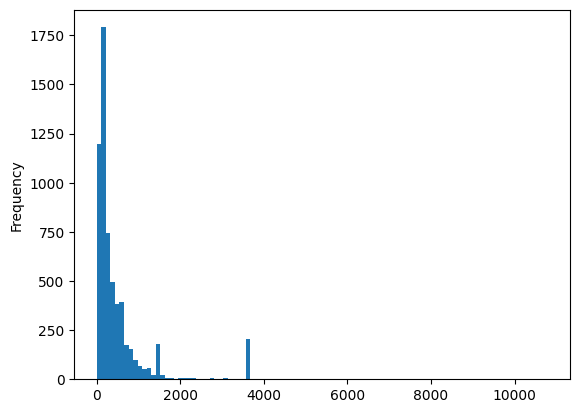

In [13]:
fig = df["Text Length"].plot.hist(bins=100, )

In [14]:
type(fig)

matplotlib.axes._axes.Axes

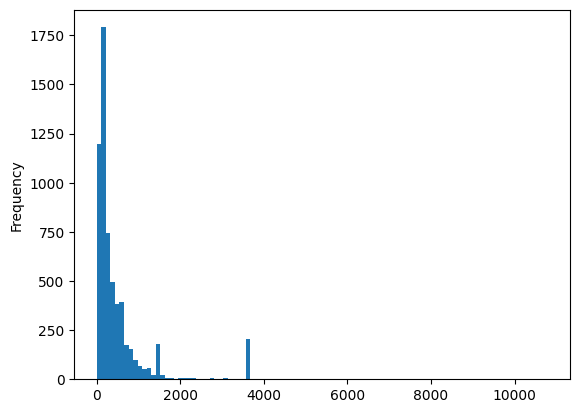

In [15]:
import tikzplotlib
fig = df["Text Length"].plot.hist(bins=100, )
tikzplotlib.save("test.tex")

In [18]:
import plotly.express as px
px.histogram(df, x="Text Length", nbins=100)

In [23]:
from langdetect import detect
import numpy as np

In [24]:
def lang_annotate(text):
    try:
        return detect(text)
    except:
        return np.nan

In [25]:
df["Language"] = df["Text"].apply(lang_annotate)

In [38]:
df["Language"].nunique()

16

In [34]:
value_counts[value_counts > 100]

de    3377
en    2513
fr     200
Name: Language, dtype: int64

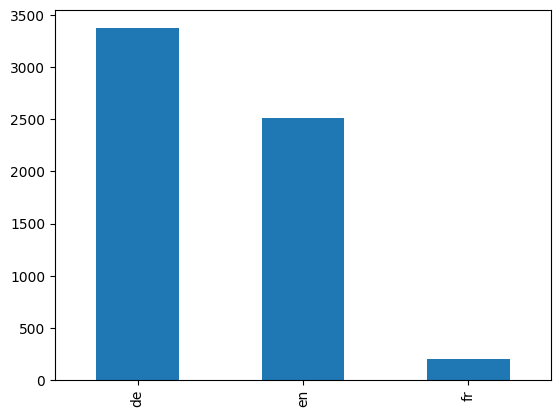

In [36]:
# plot as bar chart
value_counts[value_counts > 100].plot.bar()
tikzplotlib.save("language.tex")

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [95]:
abteilungen = ["Basis ", "Applikation ", "Vertrag "]
df.dropna(subset=["Abteilung Label"], inplace=True)

Basis 


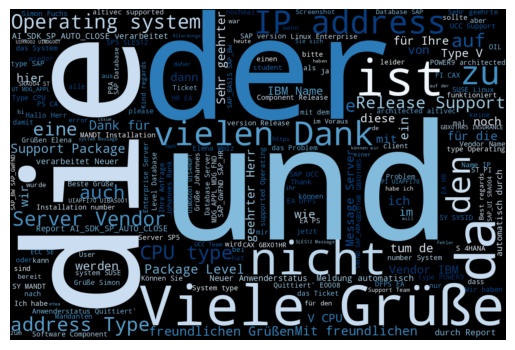

Applikation 


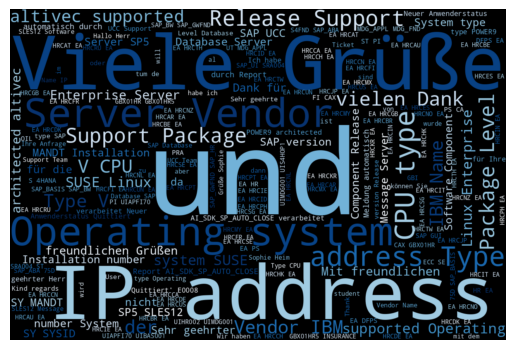

Vertrag 


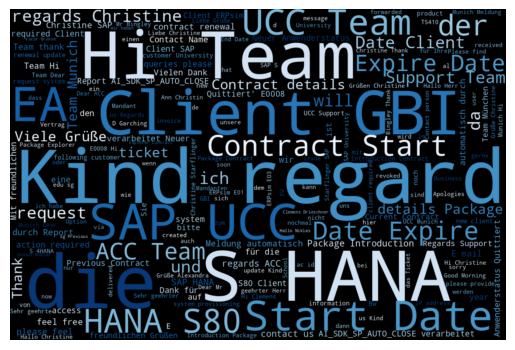

In [97]:
for abteilung in abteilungen:
    df_filtered = df[df["Abteilung Label"].str.contains(abteilung)]
    test = [text for text in df_filtered["Text"]]
    test = " ".join(test)
    wordcloud = WordCloud(width=1280, height=853, margin=0,
                          colormap='Blues').generate(test)

    print(abteilung)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()